<div style="text-align: center;">
    <h1 style="
        background: linear-gradient(135deg, #786603ab, #bba73a57); 
        color: white; 
        padding: 15px 30px; 
        border-radius: 500px; 
        font-family: 'Segoe UI', Arial, sans-serif; 
        box-shadow: 0 4px 15px rgba(0,0,0,0.3);
        display: inline-block;
    ">
       Fake News Prediction Using Logistic Regression
    </h1>
</div>

In [ ]:
#!pip install wordcloud

<h4 style="color:#ffd900ab">1. Importing Required Libraries for Fake News Detection Using NLP and Machine Learning Models</h4>

In [122]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


<h4 style="color:#ffd900ab">2. Downloading NLTK Stopwords for Text Preprocessing</h4>


In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rammah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<h4 style="color:#ffd900ab">3. Displaying the List of English Stopwords from NLTK</h4>

In [18]:
print(str(stopwords.words('english'))) 

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

<h4 style="color:#ffd900ab">4. Loading and Labeling Fake and True News Datasets, Then Merging Them into One DataFrame</h4>

In [19]:
fake=pd.read_csv(r"C:\Users\Rammah\OneDrive\Desktop\اجازه ان شاء الله\Projects\Fake News Prediction\Data\Fake.csv")
true=pd.read_csv(r"C:\Users\Rammah\OneDrive\Desktop\اجازه ان شاء الله\Projects\Fake News Prediction\Data\True.csv")
fake['class']=0
true['class']=1
data=pd.concat([fake,true],axis=0)

<h4 style="color:#ffd900ab">5. Exploring the Dataset: Shape, Missing Values, and Sample Records</h4>

In [20]:
print(f"data.shape -> (row,colums): {data.shape}")
print("----------")
print(f"Total missing values: {data.isnull().sum().sum()}")
print("----------")
print(data.head())
print("----------")
print(data.tail())


data.shape -> (row,colums): (44898, 5)
----------
Total missing values: 0
----------
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  class  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  
----------
  

<h4 style="color:#ffd900ab">6. Separating Features and Labels for Model Training</h4>

In [21]:
X=data.drop('class',axis=1)
Y=data['class']


<h4 style="color:#ffd900ab">7. Displaying the First Few Rows of the Dataset</h4>

In [22]:
data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


<h4 style="color:#ffd900ab">8. Defining a Text Preprocessing Function: Cleaning, Lowercasing, Removing Stopwords, and Stemming</h4>

In [31]:
stemmer = PorterStemmer()
def steming(strr):
    strrr=re.sub('[^a-zA-Z]',' ',strr)
    strrr=strrr.lower()
    strrr=strrr.split()
    stop_words = set(stopwords.words('english'))
    strrr=[stemmer.stem(word) for word in strrr if not word in stop_words]
    strrr=' '.join(strrr)
    return strrr

<h4 style="color:#ffd900ab">9. Applying the Preprocessing Function to the News Text Data</h4>

In [32]:
data['text']=data['text'].apply(steming)

<h4 style="color:#ffd900ab">10. Displaying the Preprocessed Text and Extracting Features and Labels as Arrays</h4>

In [121]:
print(data['text'])
X=data['text'].values
Y=data['class'].values

0        donald trump wish american happi new year leav...
1        hous intellig committe chairman devin nune go ...
2        friday reveal former milwauke sheriff david cl...
3        christma day donald trump announc would back w...
4        pope franci use annual christma day messag reb...
                               ...                        
21412    brussel reuter nato alli tuesday welcom presid...
21413    london reuter lexisnexi provid legal regulator...
21414    minsk reuter shadow disus soviet era factori m...
21415    moscow reuter vatican secretari state cardin p...
21416    jakarta reuter indonesia buy sukhoi fighter je...
Name: text, Length: 44898, dtype: object


<h4 style="color:#ffd900ab">11. Vectorizing Text Data Using TF-IDF and Splitting into Training and Testing Sets</h4>

In [ ]:
Vectorizer = TfidfVectorizer()
Vectorizer.fit(X)
X = Vectorizer.transform(X)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)

<h4 style="color:#ffd900ab">12. Training Logistic Regression Model and Evaluating Accuracy on Training Data</h4>

In [67]:
model =LogisticRegression()
model.fit(X_train,Y_train)
pred=model.predict(X_train)
accuracy=accuracy_score(Y_train,pred)
print(f"Accuracy Score for Train data: {accuracy*100:.2f}%")

Accuracy Score for Train data: 99.01%


<h4 style="color:#ffd900ab">13. Making Predictions on Test Data and Calculating Accuracy Score</h4>

In [70]:
predtes=model.predict(X_test)
accuracy=accuracy_score(Y_test,predtes)
print(f"Accuracy Score for Test data: {accuracy*100:.2f}%")

Accuracy Score for Test data: 98.55%


<h4 style="color:#ffd900ab">14. Predicting a Random News Article and Displaying Whether It's Fake or Real</h4>

In [110]:
rand=np.random.randint(0,X_test.shape[0])
x_new=X_test[rand]
pred=model.predict(x_new)
if pred == 1:
    print(data['text'].iloc[rand])
    print("Fake News")
else:
    print(data['text'].iloc[rand])
    print("Real News")

wednesday good day donald trump aftermath disastr comey hear confirm donald team inde investig rep nune decis skip inform fellow congression russia investig perfectli legal incident collect inform trump associ possibl presid run donald instead trump flail attempt distract whole russia thing much possibl go hard u offici confirm fact suggest member team inde work enemi cnn report fbi inform indic associ presid donald trump commun suspect russian oper possibl coordin releas inform damag hillari clinton campaign us offici told cnn
Fake News


<h4 style="color:#ffd900ab">15. Generating and Displaying a Word Cloud for Fake News Articles</h4>

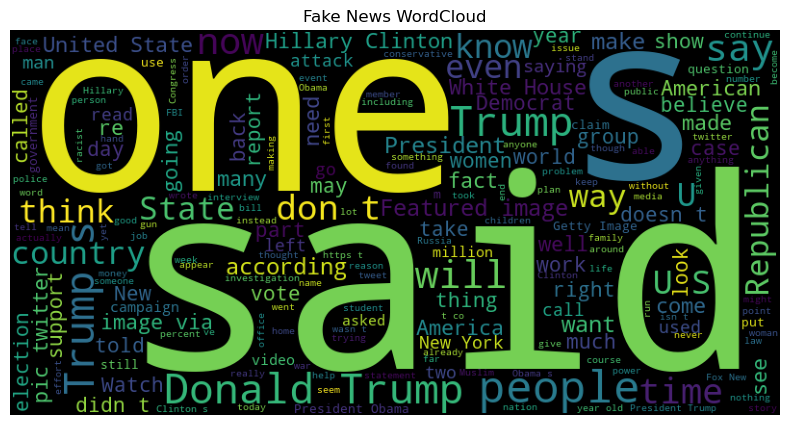

In [114]:
fake_words = ' '.join(fake['text'])
fake_wc = WordCloud(width=800, height=400).generate(fake_words)
plt.figure(figsize=(10,5))
plt.title("Fake News WordCloud")
plt.imshow(fake_wc)
plt.axis('off')
plt.show()

<h4 style="color:#ffd900ab">16. Generating and Displaying a Word Cloud for Real News Articles</h4>

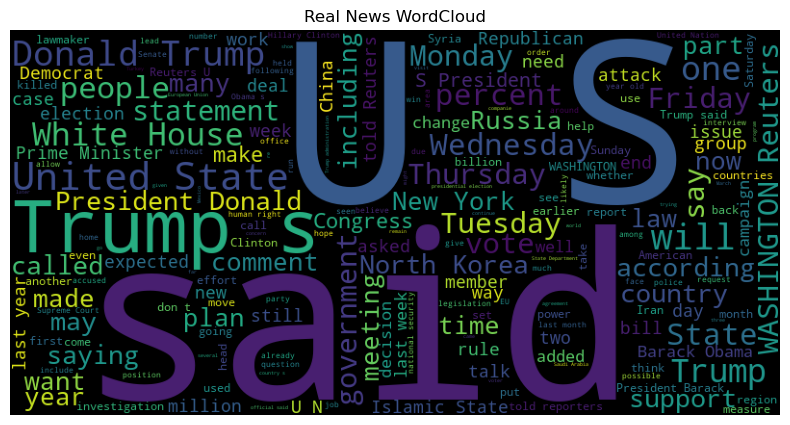

In [115]:
true_words = ' '.join(true['text'])
true_wc = WordCloud(width=800, height=400).generate(true_words)
plt.figure(figsize=(10,5))
plt.title("Real News WordCloud")
plt.imshow(true_wc)
plt.axis('off')
plt.show()

<h4 style="color:#ffd900ab">17. Training and Evaluating Multiple Machine Learning Models for Comparison</h4>

In [120]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "SVM": LinearSVC()
}

for name, model in models.items():
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(Y_test, pred)
    print(f"{name} Accuracy: {acc*100:.2f}%")

Naive Bayes Accuracy: 93.41%
Random Forest Accuracy: 99.17%
SVM Accuracy: 99.35%
